In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('MayaEurope_2013.csv',delimiter =';')



In [47]:
I_2011

,Pred Year,Pred brent 2013,Pred FO 1% 2013,Pred FO 3.5% 2013,Pred Jet 2013,TD 2013,Actual 2013,MD 2013
0,2007,35.00,-5.90,-10.90,11.28,NaN,-10.6,NaN
1,2008,78.80,-13.72,-22.00,23.32,NaN,-10.6,NaN
2,2009,67.00,-12.46,-17.85,17.69,NaN,-10.6,NaN
3,2010,83.75,-8.05,-13.60,17.74,-11.68,-10.6,0.00
4,2011,105.00,-3.58,-9.82,22.56,-11.05,-10.6,-7.54
5,2012,105.00,-4.80,-10.81,17.04,-8.28,-10.6,-6.84


In [48]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


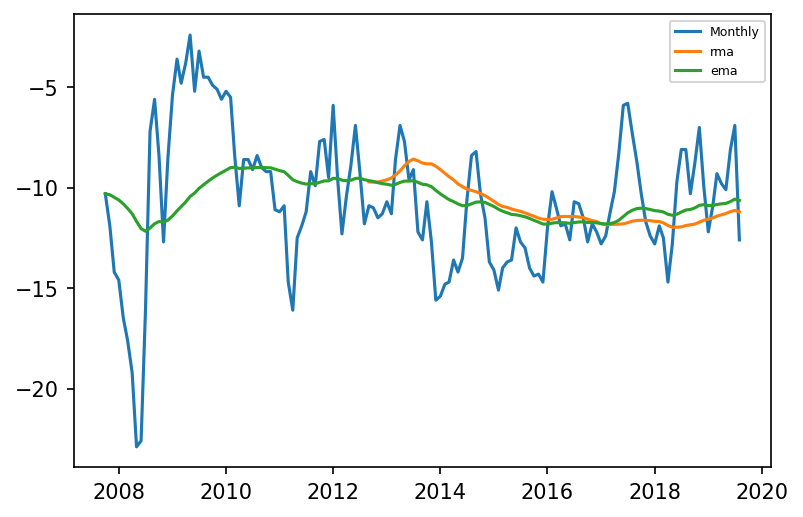

In [49]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Maya Europe"].rolling(window=60).mean()
ema60 = combi["Maya Europe"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Maya Europe"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [50]:
take=2013

In [51]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([nan]),
 array([-10.61373551]),
 array([-11.40888852]),
 array([-9.11923808]),
 array([-9.14884739]),
 array([-9.53561932])]

In [52]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan])]

In [53]:
combi=combi.fillna(0)

X = combi[['Dubai','FO 3.5%']]
Y = combi['Maya Europe']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)




Intercept: 
 -2.2689583403857956
Coefficients: 
 [-1.05218098  0.52954271]
                            OLS Regression Results                            
Dep. Variable:            Maya Europe   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     27.36
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           2.13e-11
Time:                        13:53:47   Log-Likelihood:                -727.36
No. Observations:                 236   AIC:                             1461.
Df Residuals:                     233   BIC:                             1471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
input_2011 = pd.read_table('pred_Dubai2013.csv',delimiter =',')


In [55]:
Du= input_2011.iloc[:,1]
FO35= I_2011["Pred FO 3.5% 2013"]

linear_MayaE=regr.intercept_+ regr.coef_[0]*Du + regr.coef_[1]*FO35
print(linear_MayaE)

0   -5.511612
1   -9.088026
2   -7.904222
3   -6.878619
4   -6.015571
5   -6.314974
dtype: float64


In [56]:

Du= input_2011.iloc[:,2]
nonlinear_MayaE = Du + 0.397436545016001*(FO35) + 0.000372657746925089*Du*np.power(FO35,2) - 3.89483828551919 - 0.0101406372095834*np.power(Du,4) - 0.0903722928130744*np.power(Du,3)


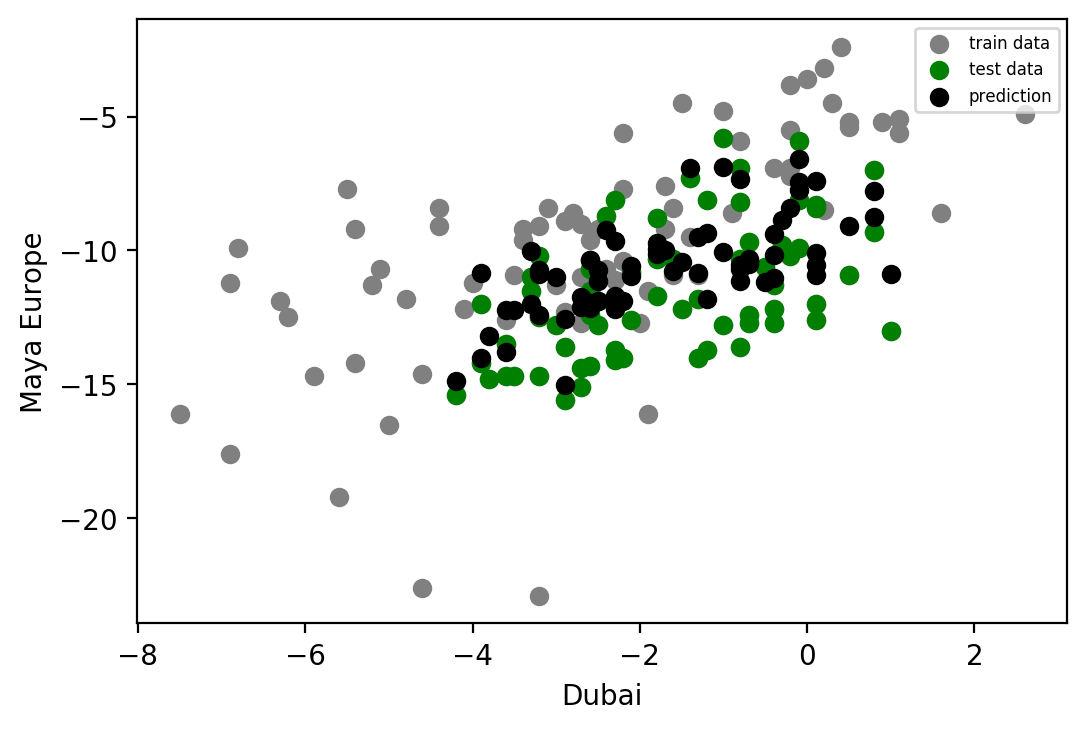

Mean squared error: 2.39
Feature ranking:
Feature Dubai (0.149773)
Feature FO 3.5% (0.850227)


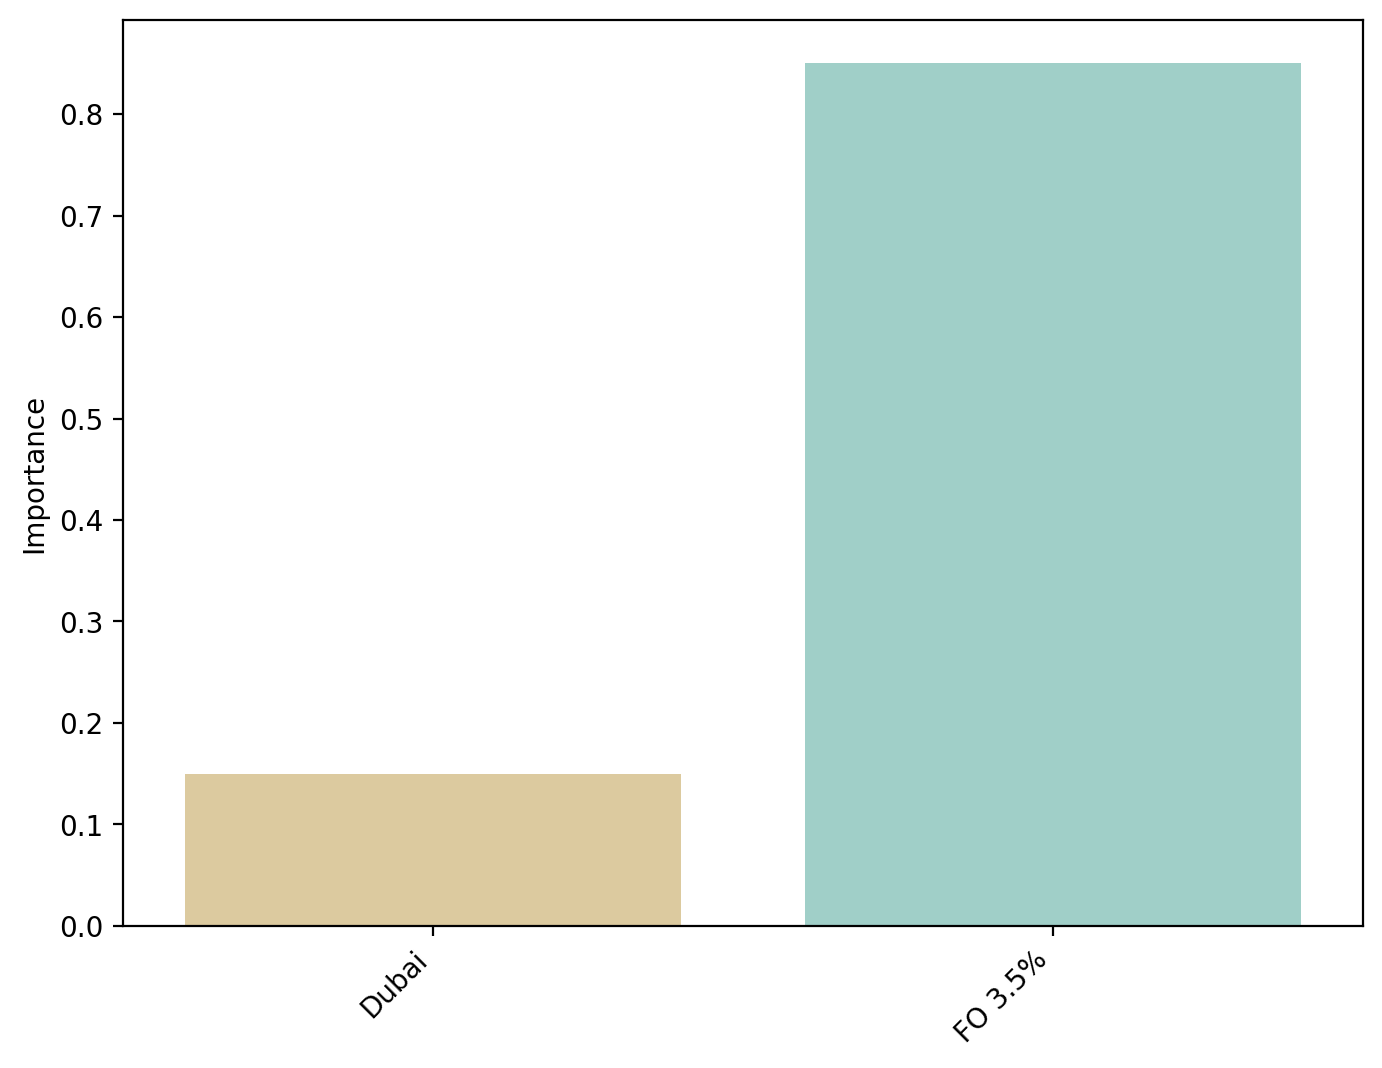

In [57]:
#train_combi = combi.iloc[95:166,1:]
train_combi = combi.iloc[95:,1:]
test_combi = combi.iloc[167:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dubai","FO 3.5%"]]
y_train=train_combi["Maya Europe"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dubai","FO 3.5%"]]
y_test=test_combi["Maya Europe"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dubai"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dubai"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dubai"], y_pred,  color='black')



plt.xlabel("Dubai")
plt.ylabel("Maya Europe")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [59]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]

Du= input_2011.iloc[:,3]

data_df = pd.concat([Du,FO35],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

           0
0 -10.206336
1 -15.085512
2 -12.055018
3 -10.387641
4  -9.977959
5 -10.108823


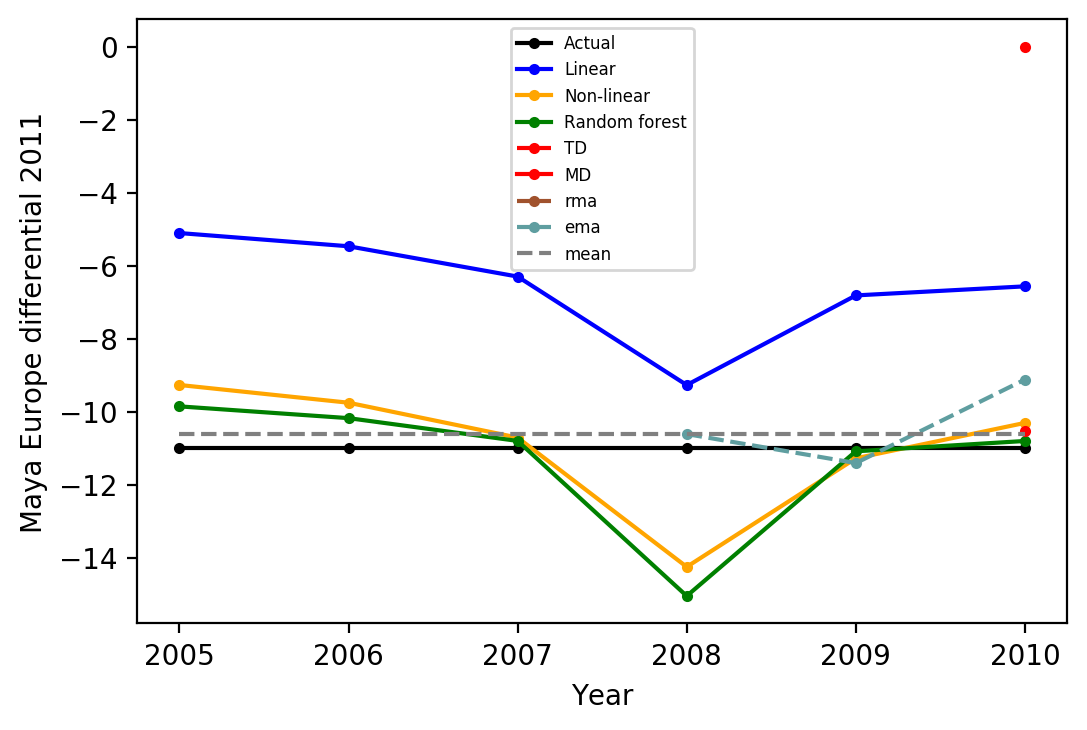

In [30]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaE,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaE,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-10.6,-10.6],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya Europe differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


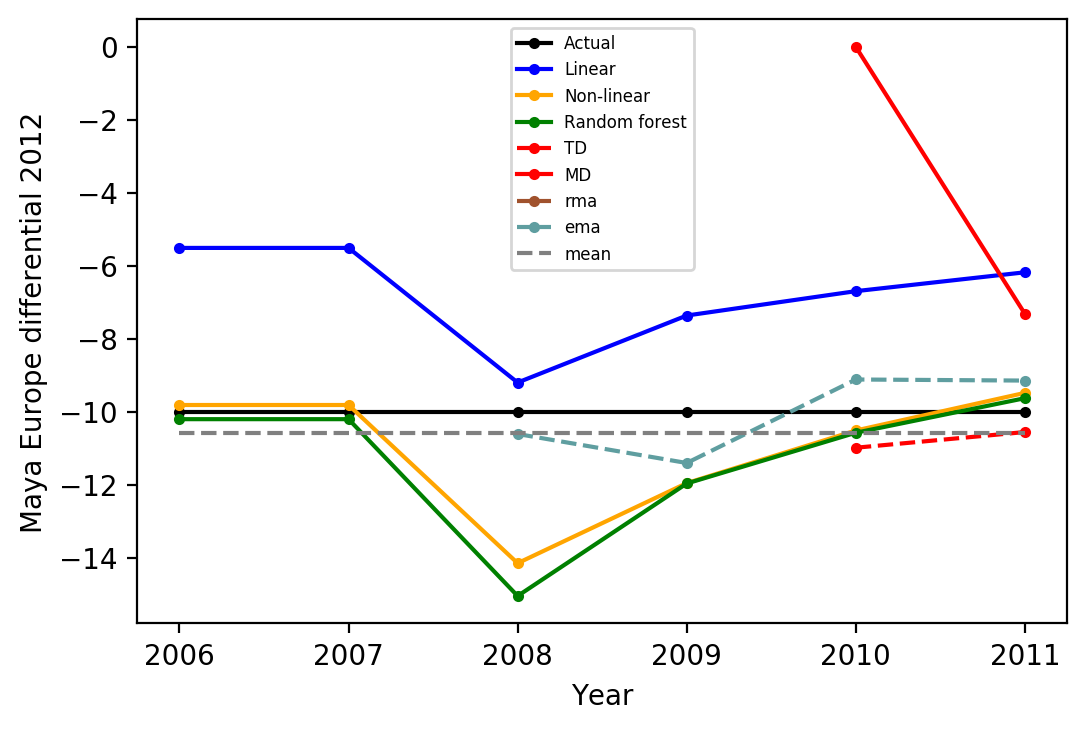

In [45]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaE,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaE,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-10.6,-10.6],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya Europe differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))




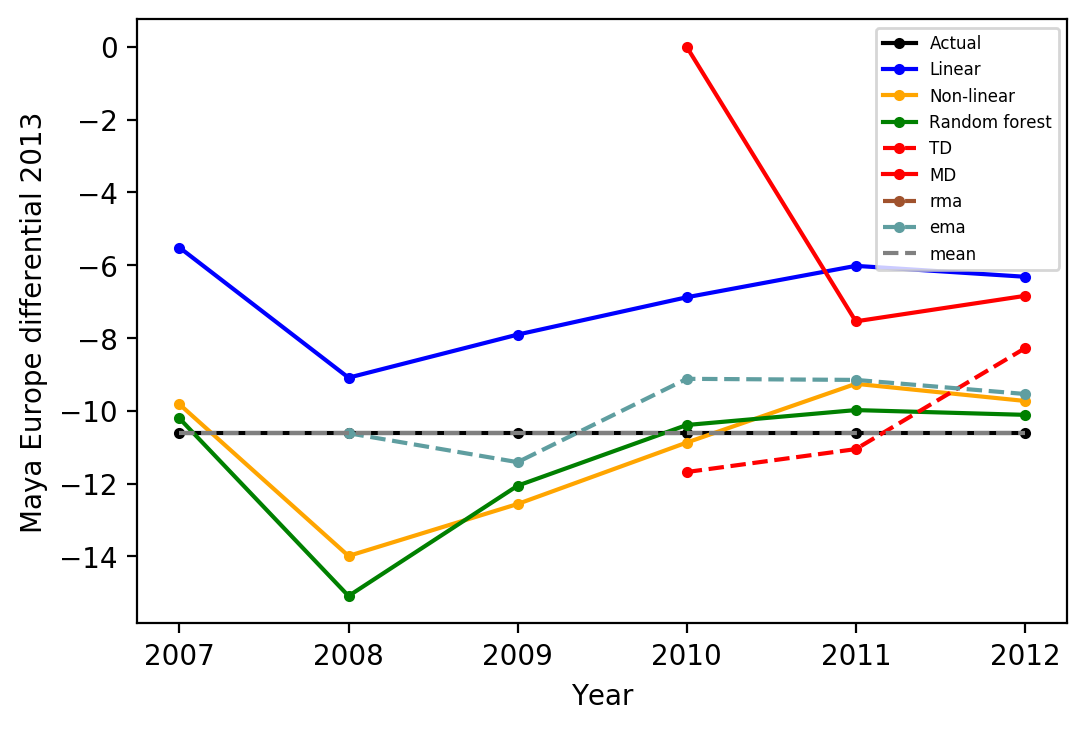

In [60]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaE,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaE,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-10.6,-10.6],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya Europe differential 2013')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))



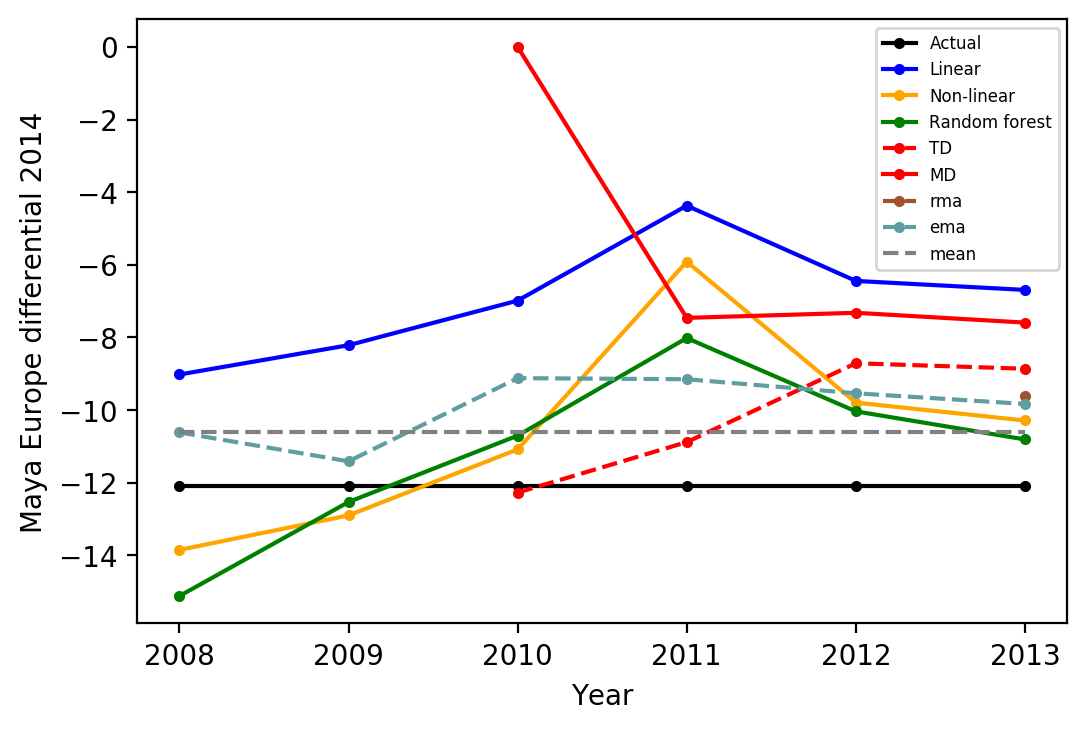

In [16]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2014"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaE,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaE,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2014"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2014"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-10.6,-10.6],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya Europe differential 2014')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))



In [59]:
MayaE_2014 = pd.concat([linear_MayaE, nonlinear_MayaE,y_pred],axis=1)
MayaE_2014

,0,1,0
0,-9.018840,-13.847733,-14.680800
1,-8.212288,-12.897524,-11.887171
2,-6.984803,-11.080702,-8.254269
3,-4.370391,-5.912099,-4.390296
4,-6.442669,-9.793076,-8.395991
5,-6.690009,-10.284994,-9.703427


In [60]:
MayaE_2014.to_csv('pred_MayaEurope2014.csv')
